In [63]:
from os import listdir, makedirs
from matplotlib import pyplot as plt
import numpy as np
from typing import List, Dict, Any

In [66]:
makedirs("output", exist_ok=True)

In [40]:
PATH = "results_runs2/runs2_res"

files = [(f"{PATH}/{f}", f) for f in listdir(PATH)]

data = {}
for f, fn in files:
    names = ".".join(fn.split(".")[:-2]).split("_")
    algo = names[2]
    gran = names[3]
    stop = names[4]
    stem = names[5]

    options = {}

    if algo == "bm25":
        options["k1"] = float(names[6][1:])
        options["b"] = float(names[7][1:])

    agp = []
    with open(f) as fd:
        lines = fd.readlines()

    for i in range(7):
        agp.append(float(lines[21 + 7 * 21].split()[2]))
    
    magp = float(lines[155].split()[2])

    data[f] = {
        "agp": agp,
        "magp": magp,
        "algo": algo,
        "gran": gran,
        "stop": stop,
        "stem": stem,
        "options": options
    }

algo_data = {}
for k, v in data.items():
    a = v["algo"]
    if a in algo_data:
        algo_data[a].append(v)
    else:
        algo_data[a] = [v]

In [41]:
algos = [a for a in algo_data]
algos

['ltc', 'ltn', 'bm25']

In [57]:
def plot_lt(algo: str):
    x = []
    y = []
    for ada in algo_data[algo]:
        stem = ada["stem"]
        stop = ada["stop"]
        magp = ada["magp"]

        x.append(magp)
        y.append(f"[{stem} / {stop}]")

    pos = np.arange(len(y))

    plt.barh(pos,
                x, 
                tick_label=y,
                align='center',
                height=0.5,
        )


## Formule LTN

$$\text{LTN}_{t,d} = 1 + \log tf_{t,d} \times \frac{N}{n}$$

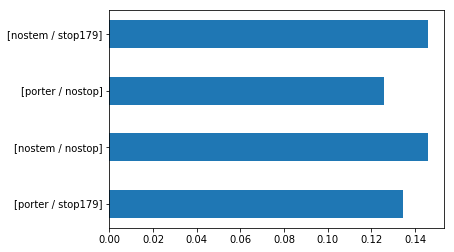

In [71]:
plot_lt("ltn")
plt.savefig("output/ltn.png",bbox_inches='tight')

## Formule LTC

$$ \text{LTC}_{t,d} = \frac{\text{LTN}_{t,d}}{\sqrt{\sum_{t'} \text{LTN}_{t',d}^2}} $$

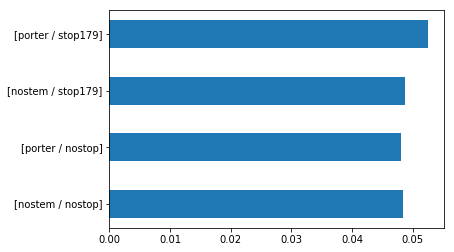

In [72]:
plot_lt("ltc")
plt.savefig("output/ltc.png",bbox_inches='tight')


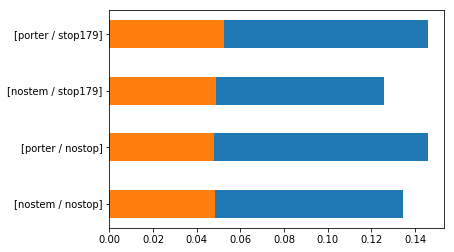

In [70]:
plot_lt("ltn")
plot_lt("ltc")
plt.savefig("output/ltntlc.png",bbox_inches='tight')
